### Loan Default - Predicitive Analytics by AFMA

Data was obtained from https://www.kaggle.com/datasets/nikhil1e9/loan-default

Objectives of project: 
1. Preprocess data for machine learning
2. Train a ML model to predict customers who are more likely to default on loans
3. Evaluate model performance
4. Try to understand the key predictors of default

> **1. Import Library**

In [ ]:
pip install scikit-learn

In [ ]:
pip install imbalanced-learn

In [ ]:
pip install xgboost

In [1]:
#for data manipulation 
import pandas as pd
import numpy as np

#for preprocessing & modelling
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize


#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

> **2. Import Data**

In [2]:
#import data
raw = pd.read_csv('C:/Users/farina/Documents/personal/DA PROJECT/01. Loan Default/Loan_default.csv')

#check data
raw.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


>**3. EDA & Pre Processing** 

In [3]:
# shape of dataset
raw.shape

(255347, 18)

In [4]:
# data type / basic info on each column
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
# from here we observe we have: 
# 9 numerical columns 
# 7 categorical columns
# 1 id column
# 1 target column (Default)

In [6]:
# lets see that categories avaliable in each column

value_counts = raw.select_dtypes(include='object').nunique()

for i in raw.select_dtypes(include = 'object').columns[1:]:
    print (f"{i}:")
    print(f"Category values: {raw[i].unique()}")
    print(f"Category count: {value_counts[i]}\n")

Education:
Category values: ["Bachelor's" "Master's" 'High School' 'PhD']
Category count: 4

EmploymentType:
Category values: ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
Category count: 4

MaritalStatus:
Category values: ['Divorced' 'Married' 'Single']
Category count: 3

HasMortgage:
Category values: ['Yes' 'No']
Category count: 2

HasDependents:
Category values: ['Yes' 'No']
Category count: 2

LoanPurpose:
Category values: ['Other' 'Auto' 'Business' 'Home' 'Education']
Category count: 5

HasCoSigner:
Category values: ['Yes' 'No']
Category count: 2



In [7]:
# 7 categorical columns may/will need to be encoded for further analysis)

In [8]:
# looking at numerical columns

raw.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [9]:
# check for missing data 

print(raw.isnull().sum())

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [10]:
count = (raw == 0).sum()
print('Count of zeros in dataset: ', count)

Count of zeros in dataset:  LoanID                 0
Age                    0
Income                 0
LoanAmount             0
CreditScore            0
MonthsEmployed      2122
NumCreditLines         0
InterestRate           0
LoanTerm               0
DTIRatio               0
Education              0
EmploymentType         0
MaritalStatus          0
HasMortgage            0
HasDependents          0
LoanPurpose            0
HasCoSigner            0
Default           225694
dtype: int64


In [11]:
# check for duplicate data 

print('No of duplicated values in dataset: ', raw.duplicated().sum())

No of duplicated values in dataset:  0


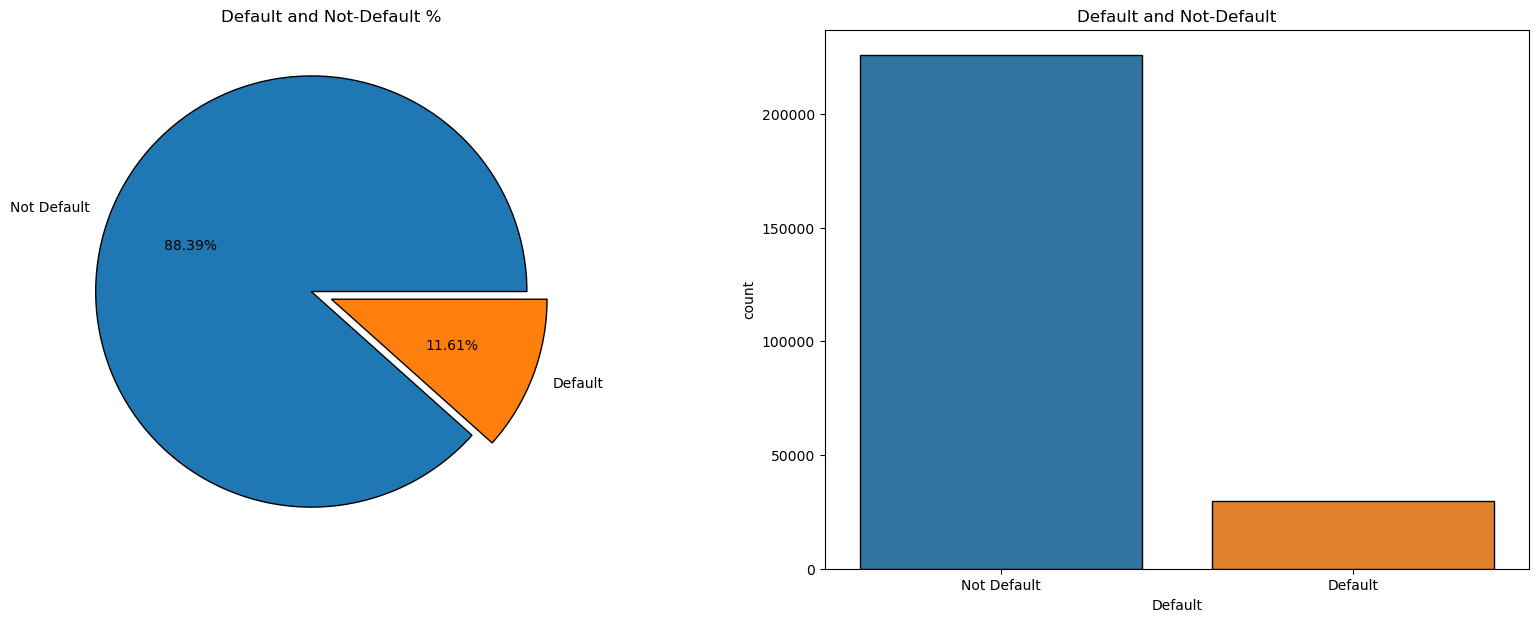

In [12]:
# lets check the distribution of default/non default in dataset

default_count = list(raw['Default'].value_counts())
pie_values = [default_count[0] / sum(default_count) * 100, default_count[1] / sum(default_count) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['Not Default','Default'], 
        autopct = '%1.2f%%',
        explode = (0.1,0),
        wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Default and Not-Default %');

plt.subplot(1,2,2)
ax = sns.countplot(data = raw, 
                   x='Default',
                   edgecolor = 'black')
ax.set_xticklabels(['Not Default','Default'])
    
plt.title('Default and Not-Default')
plt.show()

In [13]:
# imbalance ratio

imbalance_ratio = default_count[0] / default_count[1]
print("Ratio of data imbalance: ", imbalance_ratio)

Ratio of data imbalance:  7.61116919030115


In [14]:
# from the above we observe: 
# borrowers that did not default is much higher at 88.4% while borrowers who did churn is at 11.6%. 
# there is an obvious data imbalance whereby ratio is at 1: 7.6
# for 1 borrower that default, 7.6 borrowers did not default

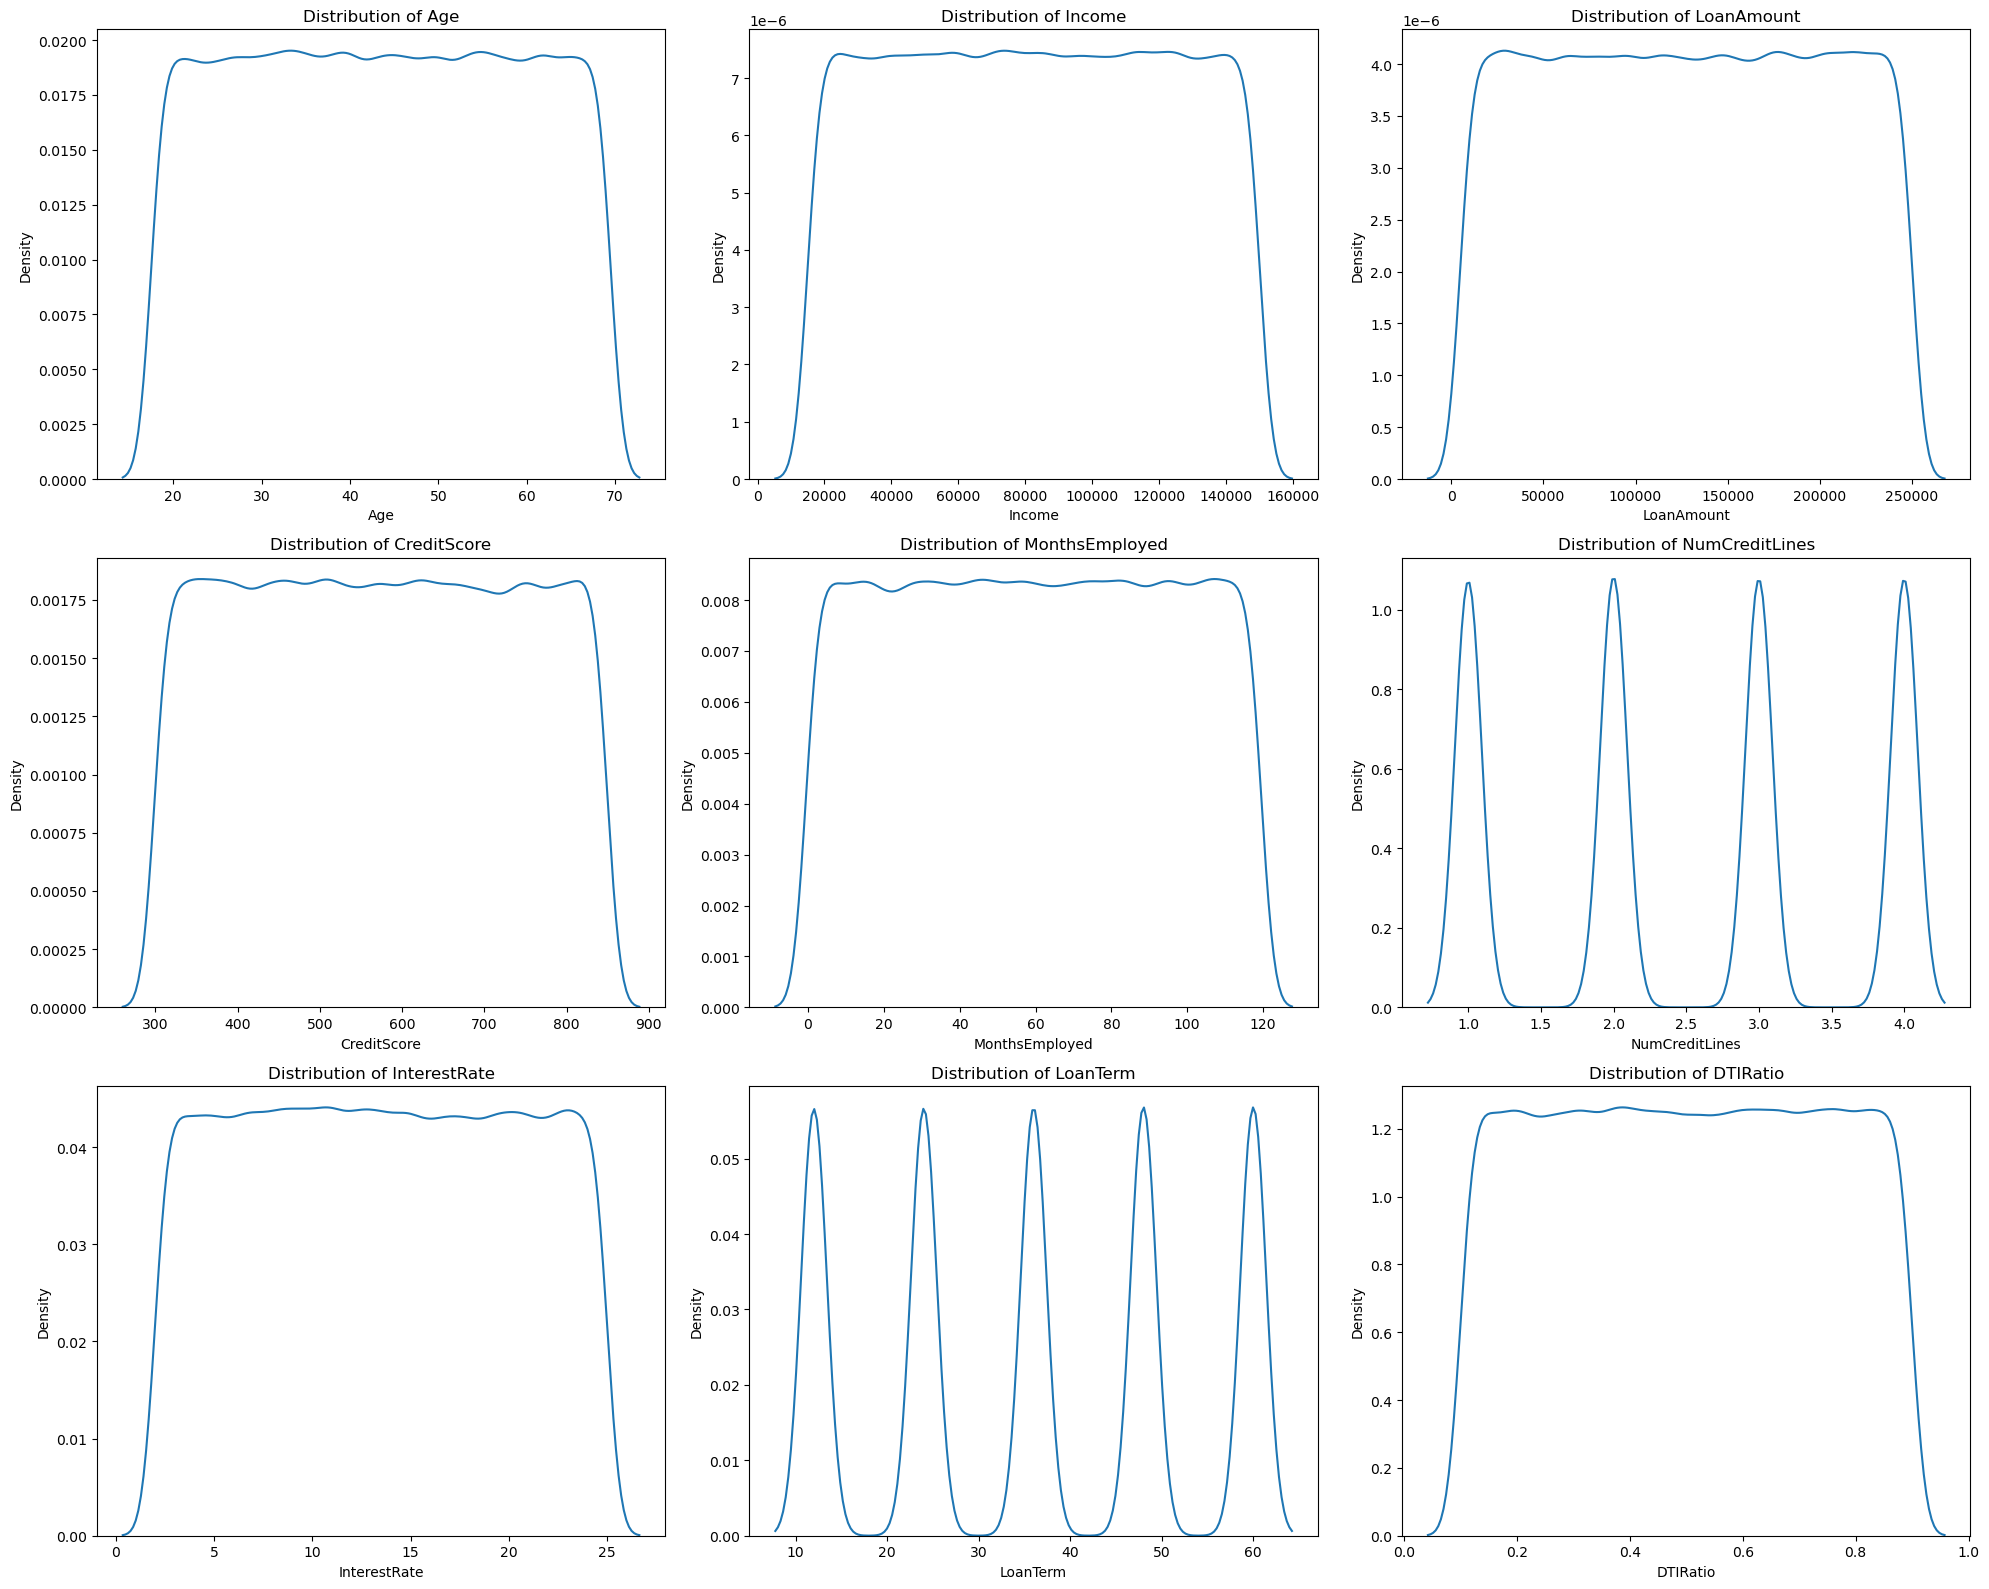

In [15]:
#visualise numerical features 

columns_to_plot = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# create a 3x3 grid of subplots
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 16))

# iterate through the rows and columns
for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3

    # Plot the histogram
    sns.kdeplot(raw[column], ax=ax[row, col])
    ax[row, col].set_title(f"Distribution of {column}")
    ax[row, col].set_xlabel(column)
    ax[row, col].set_ylabel("Density")

# adjust layout and display the plots
plt.tight_layout()
plt.show()

In [16]:
#from above, we see that all numerical columns have a quite normal distribution expect for NumCreditLines and LoanTerm. 
#Eventhough these 2 features are numerical in nature, from the plot we may infer that these are categorical features, specifically, ordinal data. 

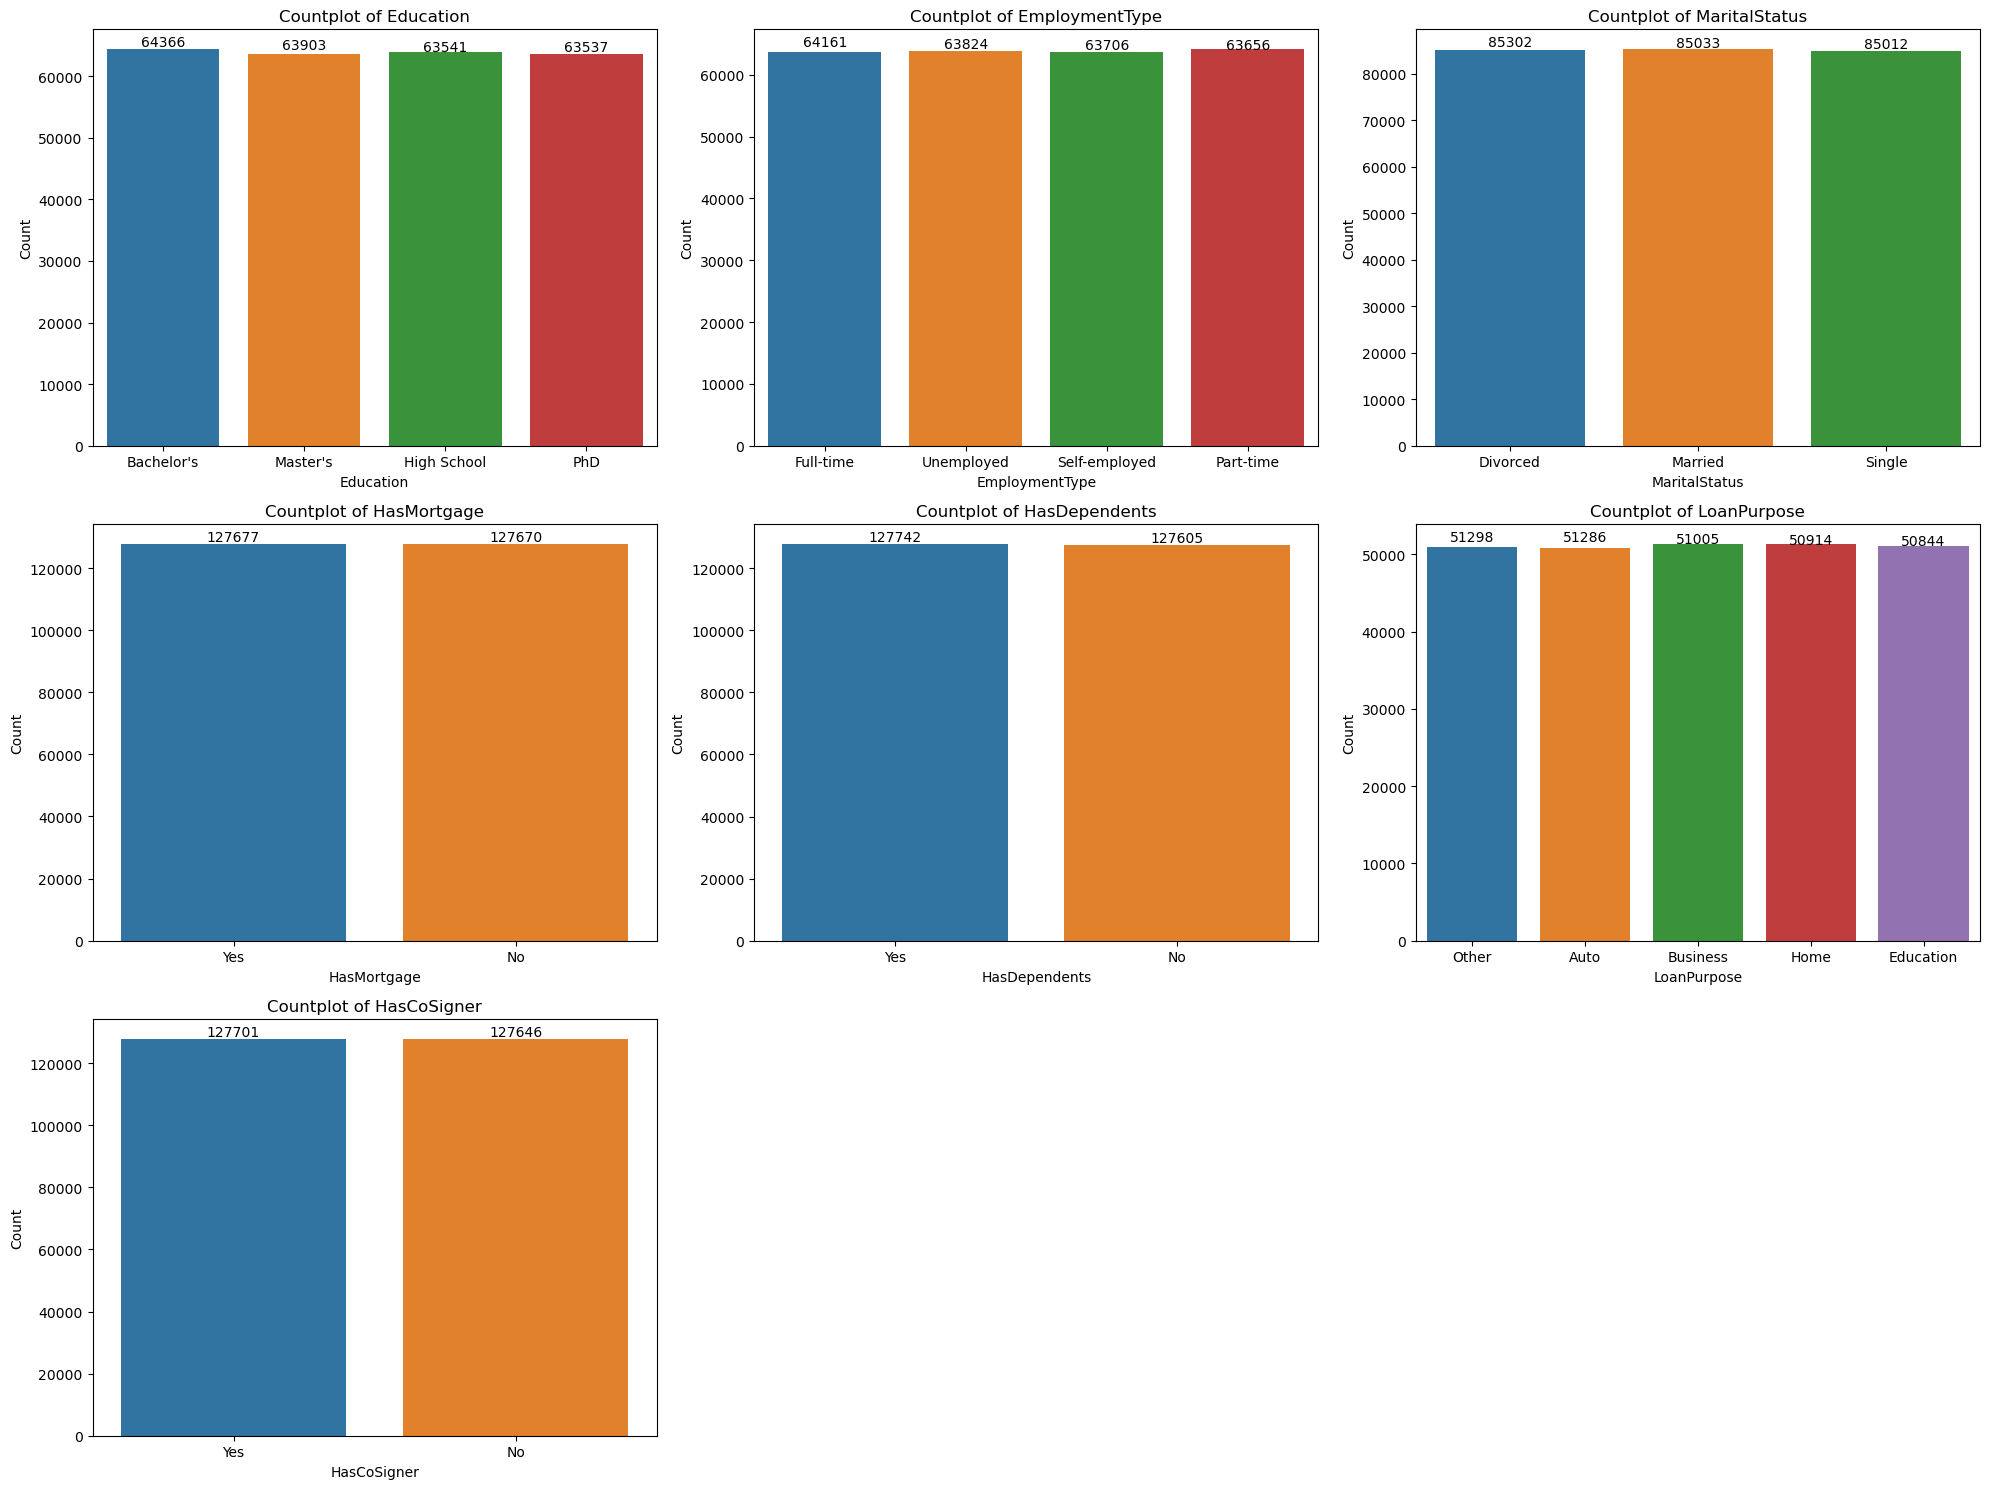

In [17]:
# visualise categorical features

# define the categorical columns you want to plot
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# calculate the number of rows and columns for subplots
num_columns = len(categorical_columns)
num_rows = (num_columns - 1) // 3 + 1  # 3 columns per row

# create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, num_rows * 5))  # Adjust the height of each row as needed

# iterate through categorical columns and corresponding subplot axes
for i, (column, ax) in enumerate(zip(categorical_columns, axes.flatten())):
    # plot the countplot
    sns.countplot(data=raw, x=column, ax=ax)
    ax.set_title(f"Countplot of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    
    # add text annotations with exact counts
    counts = raw[column].value_counts()
    for j, count in enumerate(counts):
        ax.text(j, count, str(count), ha='center', va='bottom')

# remove any empty subplots if there are more than enough
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

# adjust layout and display the plots
plt.tight_layout()
plt.show()

In [18]:
#from the above, we observe that categories in each feature is fairly distributed.

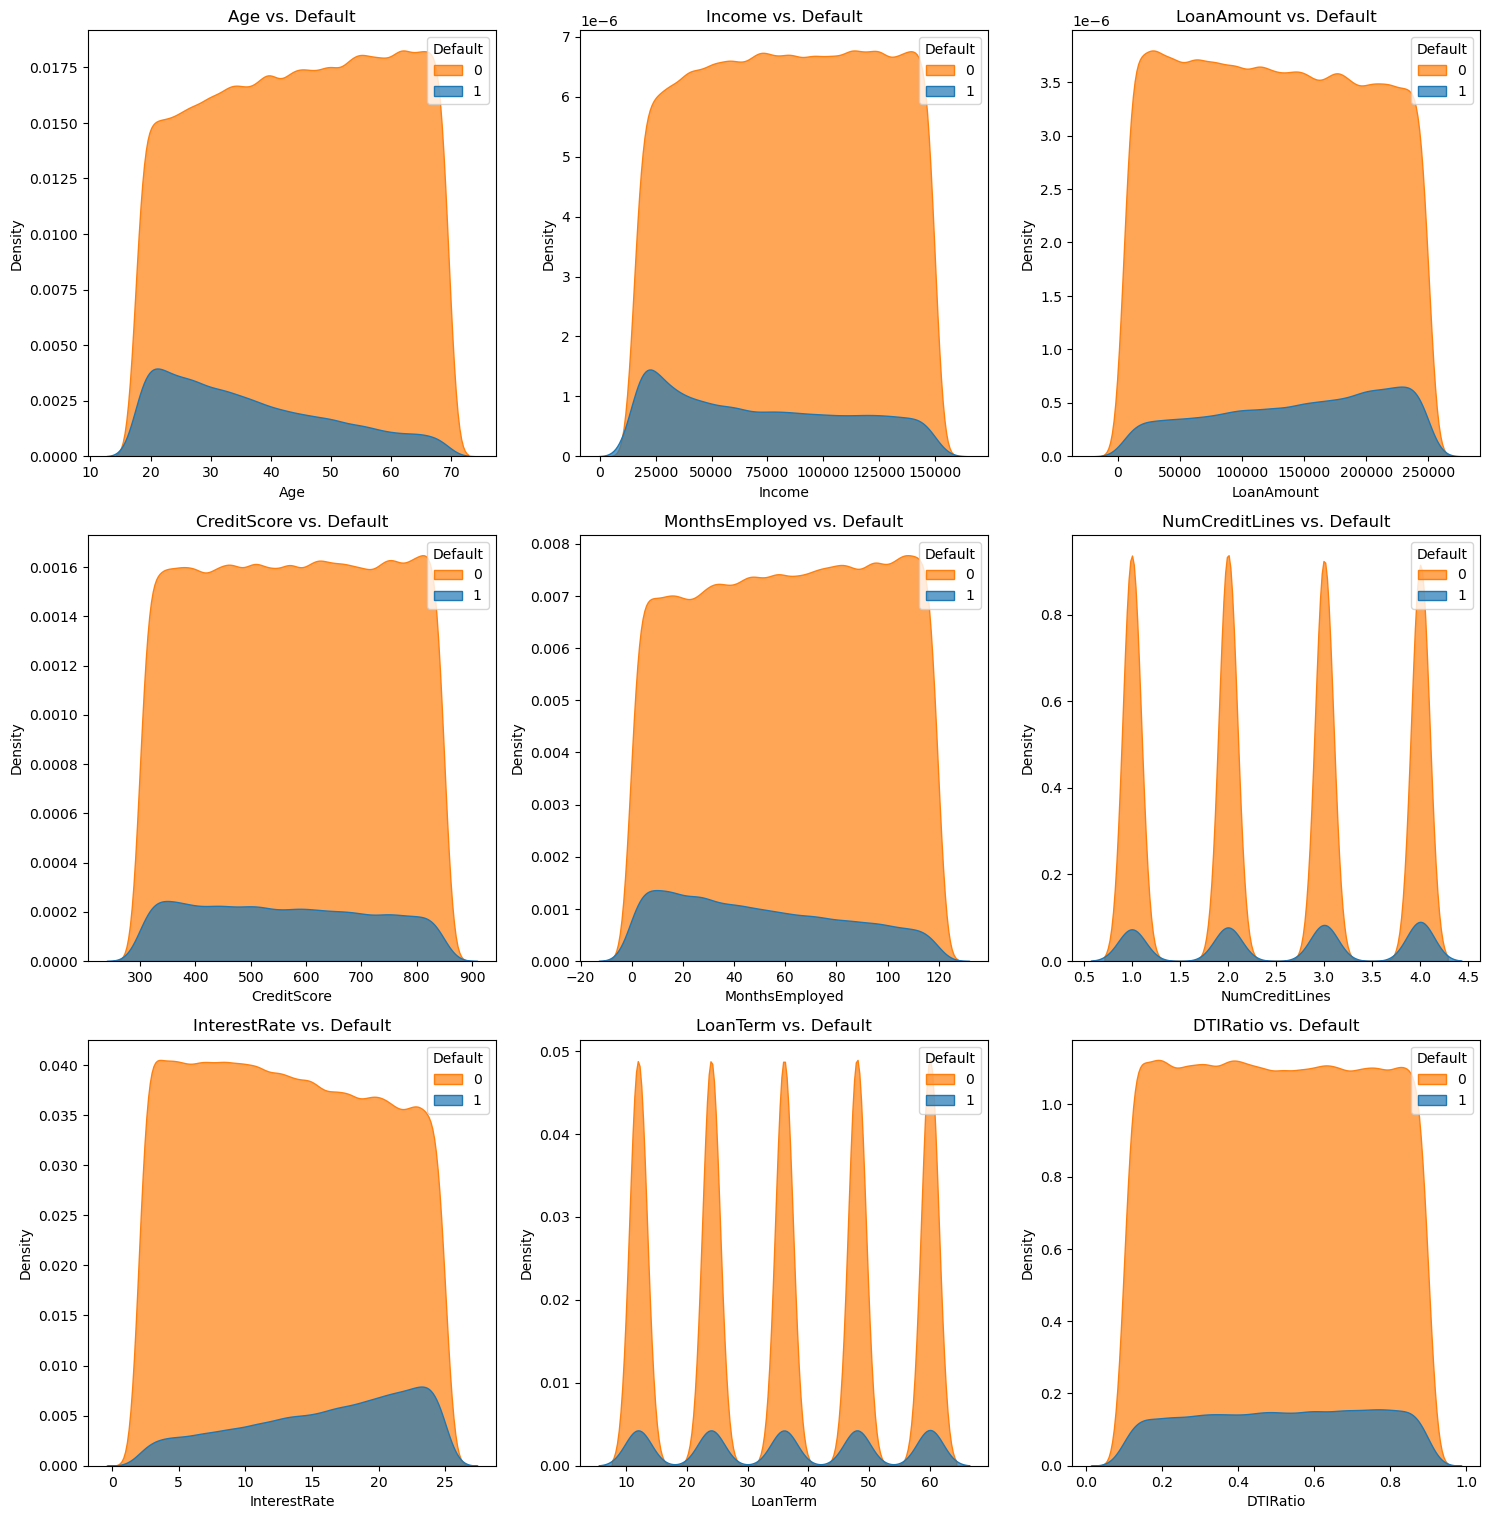

In [19]:
#bivariate analysis for numerical columns

# create subplots for numerical columns
fig, axes = plt.subplots(6, 3, figsize=(15, 5 * 6))

columns_to_plot_numerical = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Create labels for the 'Default' values
default_labels = {0: 'No Default', 1: 'Default'}

# iterate through numerical columns for analysis and create scatter plots
for i, column in enumerate(columns_to_plot_numerical):
    row = i // 3
    col = i % 3

    sns.kdeplot(data=raw, x=column, hue='Default', ax=axes[row, col], fill=True, alpha=0.7, hue_order=[1,0])
    axes[row, col].set_title(f'{column} vs. Default')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend(title='Default', labels=default_labels,  loc='upper right')

# Remove any empty subplots if there are more than enough
for i in range(len(columns_to_plot_numerical), 6 * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

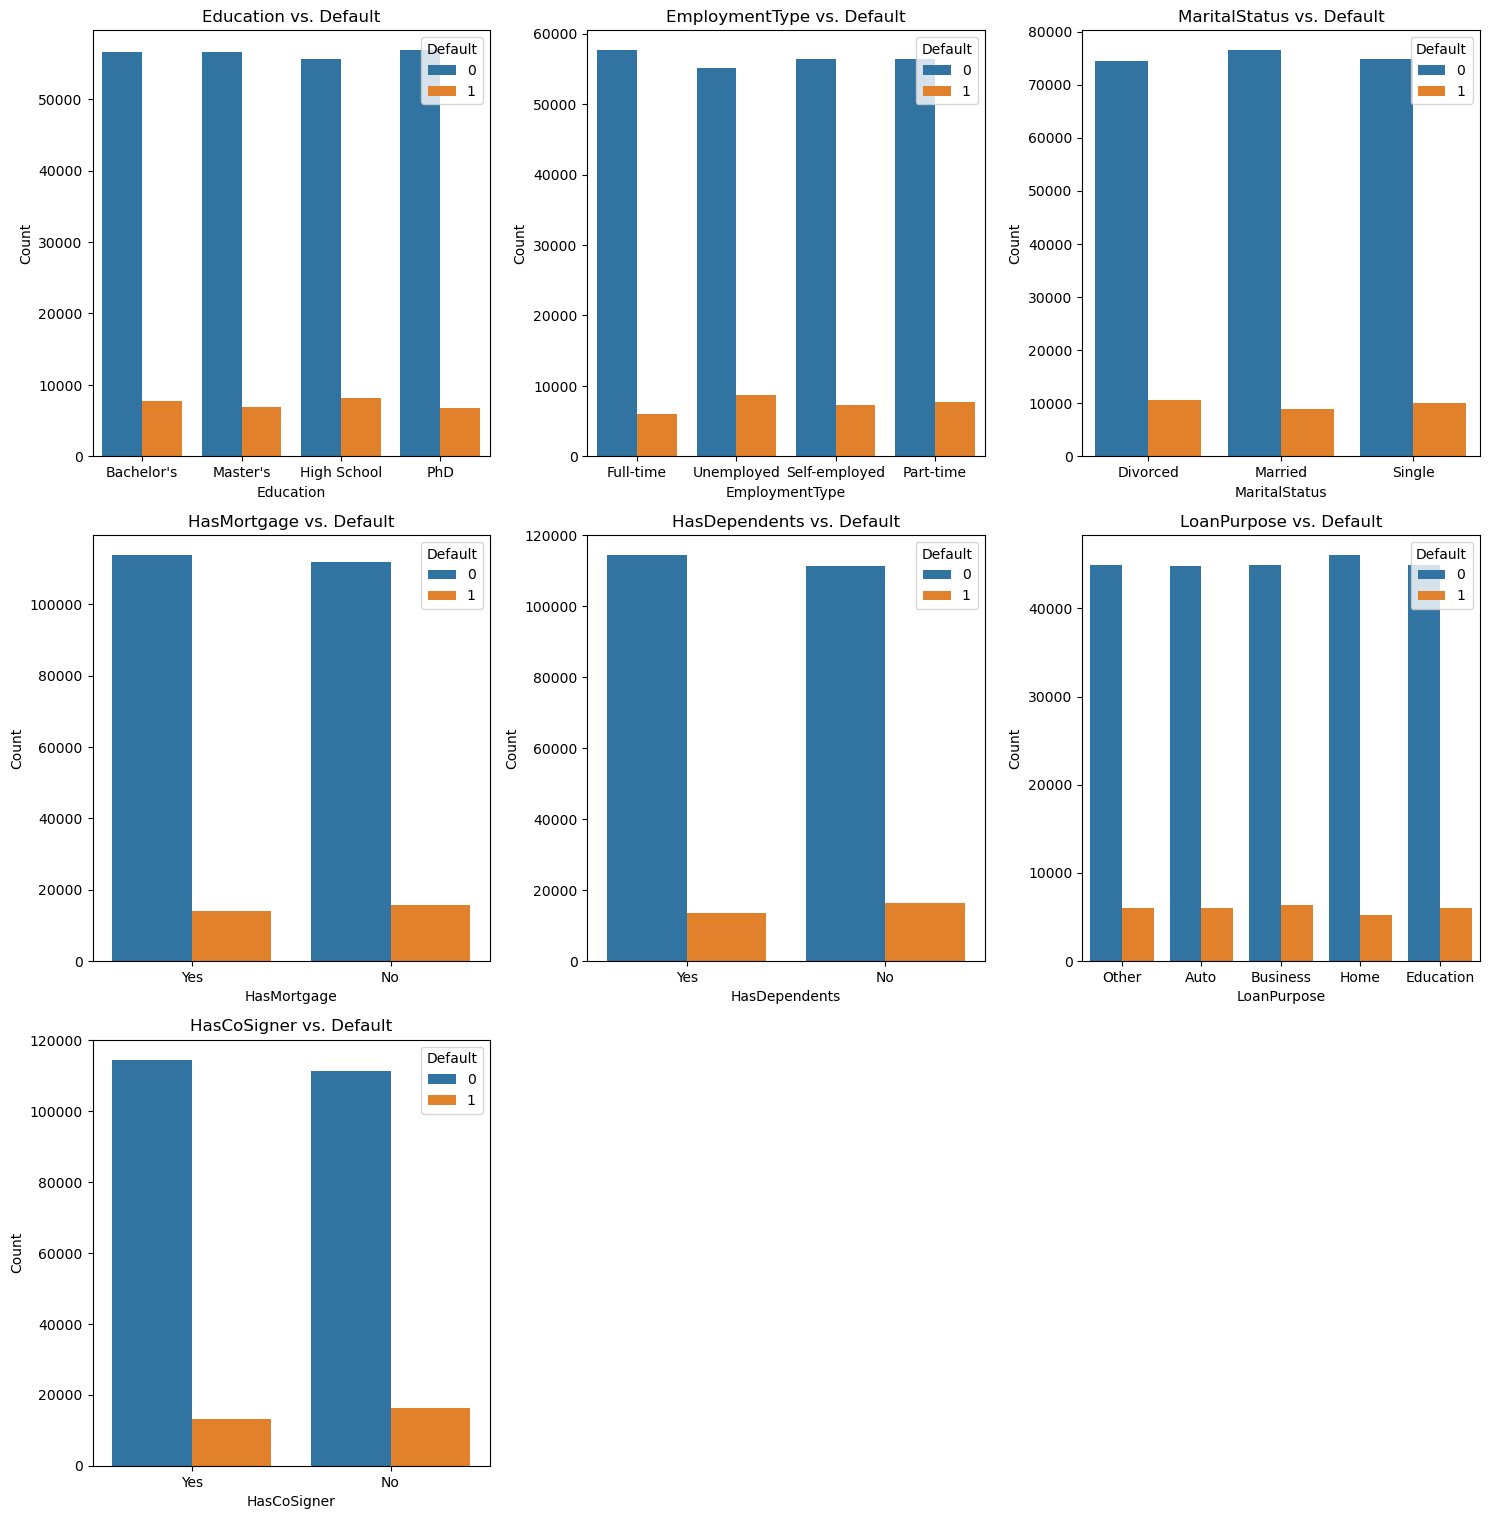

In [20]:
#bivariate analysis for categorical columns

# create subplots for categorical columns
fig, axes = plt.subplots(6, 3, figsize=(15, 5 * 6))

columns_to_plot_categorical = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Create labels for the 'Default' values
default_labels = {0: 'No Default', 1: 'Default'}

# iterate through categorical columns for analysis and create bar plots
for i, column in enumerate(columns_to_plot_categorical):
    row = i // 3
    col = i % 3

    sns.countplot(data=raw, x=column, hue='Default', ax=axes[row, col], hue_order=[0, 1])
    axes[row, col].set_title(f'{column} vs. Default')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')
    axes[row, col].legend(title='Default', loc='upper right')

# Remove any empty subplots if there are more than enough
for i in range(len(columns_to_plot_categorical), 6 * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [21]:
# we observe that 
# 1. Age 
#       Borrowers younger in age (<30) have a higher rates of default in their loan        
# 2. Income
#       Borrowers with lower income (<50,000) have higher rate of default in their loan
# 3. LoanAmount      
#       Borrowers with higher loan amount default.
# 4. CreditScore
#       Borrowers with low credit score have higher default rates      
# 5. MonthsEmployed  
#       Borrowers that have less monnths of employemnt (<20 months) have higher rates of default in their loans. 
# 6. NumCreditLines 
#       Borrowers with higher NumCreditLines have higher number of default. 
# 7. InterestRate    
#       Borrowers with higher interest rate have higher number of default
# 8. LoanTerm        
#       Not significantly different
# 9. DTIRatio        
#       Borrowers with higher DTI ratio have higher number of default loans
# 10. Education       
#       Borrowers that have educational level of high school and bachelor have a higher number of defaults in loan
# 11. EmploymentType  
#       Borrowers that are unemployed have higher number of defaults in loan. 
# 12. MaritalStatus   
#       Borrowers that are divorced have higher number of defualt loans. 
# 13. HasMortgage     
#       Borrowers that have mortgage have higher number of default loans. 
# 14. HasDependents  
#       Borrowers that does not have dependents have higher number of default loans. 
# 15. LoanPurpose    
#       Loans used for business have a higher number of default loans. 
# 16. HasCoSigner  
#       Borrowers that does not have co-signer have higher number of default loans.    

In [22]:
#pre processing - one hot encode categorical data so we can execute multivariate analysis

# Define the categorical columns you want to one hot encode 
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']

# Create a copy of the original DataFrame to avoid modifying the original data
df1 = raw.copy()

# Apply one hot encoding to each selected categorical column
df1 = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)

In [23]:
df1.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,0,0,0,0,0,0,0,0,0,1
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,0,0,0,0,1,0,0,0,0,1
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,0,0,0,1,0,0,0,0,0,0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,0,0,0,0,1,0,1,0,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,0,0,0,1,0,0,0,0,0,0


In [24]:
#pre processing - label encoding
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns you want to label encode 
categorical1_columns = ['HasMortgage', 'HasDependents', 'HasCoSigner']

# Create a copy of the original DataFrame to avoid modifying the original data
df2 = df1.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each selected categorical column
for column in categorical1_columns:
    df2[column] = label_encoder.fit_transform(df2[column])

In [25]:
df2.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,0,0,0,0,0,0,0,0,0,1
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,0,0,0,0,1,0,0,0,0,1
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,0,0,0,1,0,0,0,0,0,0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,0,0,0,0,1,0,1,0,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,0,0,0,1,0,0,0,0,0,0


<AxesSubplot: >

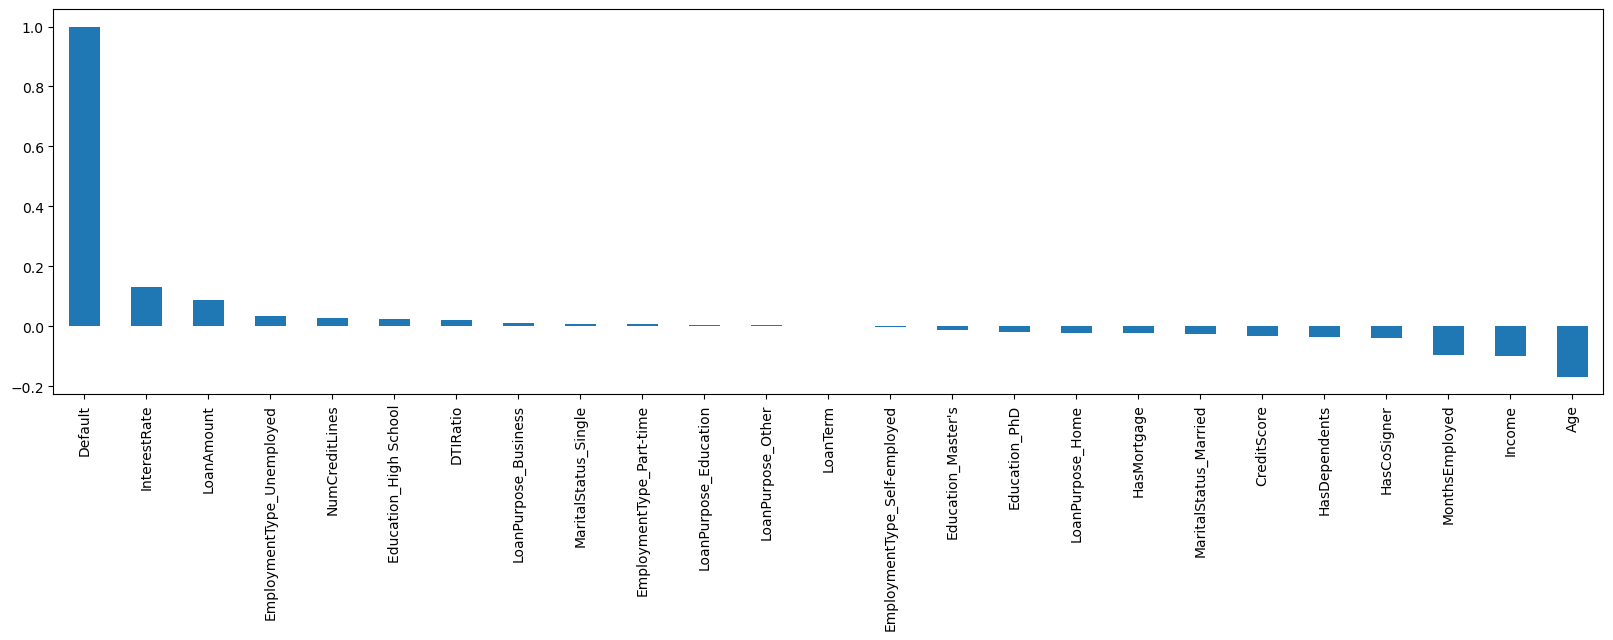

In [26]:
# multivariate analysis
#correlation

plt.figure(figsize=(16,10)) 
df2.corr()['Default'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

In [27]:
#from the above we observe that:
#InterestRate, LoanAmount, Unemployed, NumCreditLines, HighSchoolEducation, DTIRatio, BusinessLoan, Unmarried, PartTime, EducationLoan, OtherLoanPurpose have fairly positive correlation with how loans default. 
#LoanTerm has no correlation with default
#SelfEmployed, MastersEducation, PHDEducation, HomeLoans, HasMortgage, Married, HasDependents, HasCoSigner, MonthsEmployed, Income and Age are negatively correlated with Default


In [28]:
df2.rename(columns={"Education_Master's": "Education_Masters"}, inplace=True)

In [29]:
##set number of sample to 3000 bcs heavy processing load for modelling later on. 

In [30]:
df3 = df2.sample(n=3000, random_state=42).copy()

In [31]:
x = df3.drop(["LoanID","Default"],axis = 1)

x.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
51139,55,112656,92393,581,113,2,23.54,36,0.15,1,...,1,0,1,0,0,1,0,0,1,0
71005,56,91569,131575,641,54,1,15.19,12,0.43,1,...,0,1,0,0,0,0,0,1,0,0
35684,26,78169,75417,569,105,3,18.02,12,0.29,1,...,0,1,0,0,1,0,0,1,0,0
174087,26,63033,10804,326,118,1,14.71,24,0.41,0,...,0,1,0,0,0,1,1,0,0,0
137952,24,29665,21182,662,102,3,15.02,60,0.69,0,...,1,0,0,1,0,1,1,0,0,0


In [32]:
y = df3["Default"]

y.head()

51139     0
71005     0
35684     0
174087    0
137952    0
Name: Default, dtype: int64

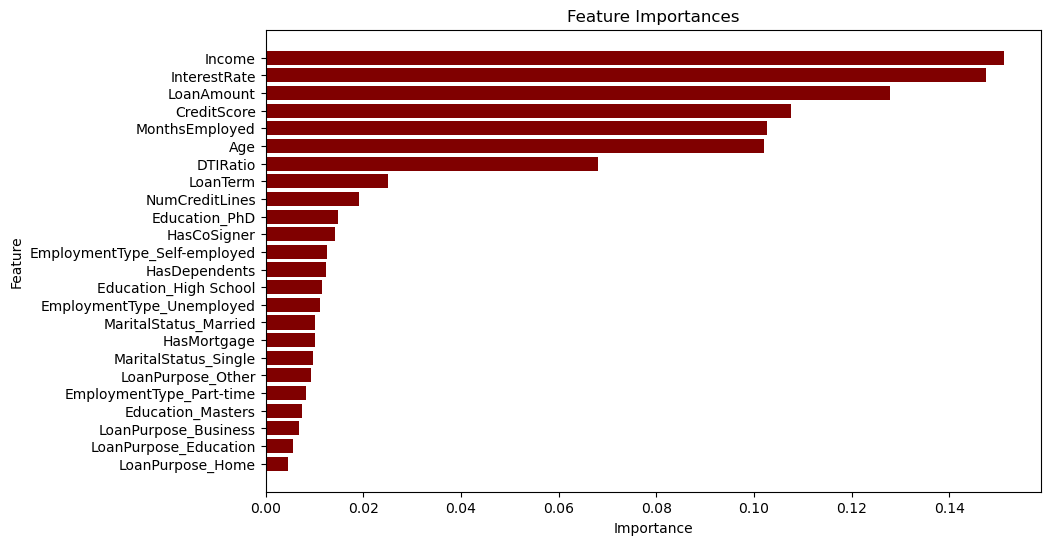

In [33]:
##FEATURE SELECTION

rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
rf_regressor.fit(x, y)
feature_importances = rf_regressor.feature_importances_


importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='maroon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  
plt.show()

In [34]:
#from the above there are 7 features that have high importance (>0.02)
#hence, we select features that have importance of more than 0.02

In [35]:
x1 = df3[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
          'InterestRate', 'DTIRatio']]

In [36]:
#Recalling the data imbalance analysis did earlier, we need to correct this before we proceed with Modelling. 
#Applying Synthetic Minority Over-Sampling Technique (SMOTE)

In [37]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x1, y)

In [38]:
y_resampled.value_counts(normalize=True)

0    0.5
1    0.5
Name: Default, dtype: float64

>**4. Data Modelling** 

In [39]:
#data scaling

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_resampled)

***Modelling***

In [40]:
def calculate_metrics(classifier, x, y):
    y_scores = cross_val_predict(classifier, x, y, cv=5, method='predict_proba')[:, 1]
    
    accuracy_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
    f1_scores = cross_val_score(classifier, x, y, cv=5, scoring='f1')
    precision_scores = cross_val_score(classifier, x, y, cv=5, scoring='precision')
    recall_scores = cross_val_score(classifier, x, y, cv=5, scoring='recall')
    roc_auc_scores = cross_val_score(classifier, x, y, cv=5, scoring='roc_auc')
    
    # Take the mean of cross-validation scores
    accuracy_mean = np.mean(accuracy_scores)
    f1_mean = np.mean(f1_scores)
    precision_mean = np.mean(precision_scores)
    recall_mean = np.mean(recall_scores)
    roc_auc_mean = np.mean(roc_auc_scores)
    
    return accuracy_mean, f1_mean, precision_mean, recall_mean, roc_auc_mean

In [41]:
def plot_metrics(classifiers, results):
    plt.figure(figsize=(12, 6))
    for metric_name, metric_results in results.items():
        plt.plot(classifiers, metric_results, label=metric_name, marker='o')

    plt.xlabel('Classifiers')
    plt.ylabel('Score')
    plt.title('Classifier Comparison (Cross-Validation)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42, probability=True),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(n_estimators=10, random_state=42),
}

results = {
    'Classifier': [],
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': [],
    'ROC AUC': []
}


      Classifier  Accuracy  F1 Score  Precision    Recall   ROC AUC
0  Decision Tree  0.792409  0.798142   0.775535  0.822489  0.792402
1  Random Forest  0.856342  0.856985   0.849683  0.864997  0.922216
2            SVM  0.695749  0.704148   0.685429  0.723965  0.758012
3           k-NN  0.821173  0.844148   0.748454  0.968034  0.907389
4    Naive Bayes  0.733735  0.738570   0.723869  0.754436  0.802467
5        XGBoost  0.794664  0.802695   0.768461  0.841305  0.877776


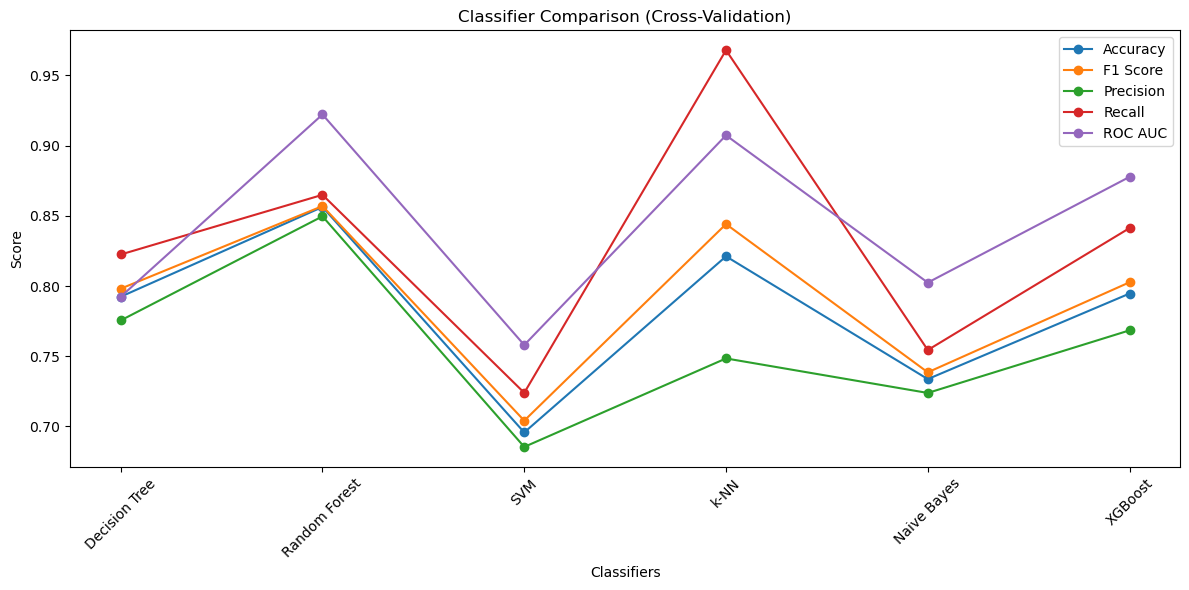

In [42]:
for classifier_name, classifier in classifiers.items():
    results['Classifier'].append(classifier_name)
    metrics = calculate_metrics(classifier, x_scaled, y_resampled)
    for metric_name, metric_value in zip(['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC'], metrics):
        results[metric_name].append(metric_value)

results_df = pd.DataFrame(results)
print(results_df)

plot_metrics(classifiers.keys(), {
    'Accuracy': results_df['Accuracy'],
    'F1 Score': results_df['F1 Score'],
    'Precision': results_df['Precision'],
    'Recall': results_df['Recall'],
    'ROC AUC': results_df['ROC AUC']
})

### Conclusions and Remarks

Random Forest classifier consistently outperformed other models across all evaluation metrics, making it the top choice for this classification task. It demonstrated high accuracy, precision, recall, and ROC AUC, showcasing its robustness in making accurate predictions while maintaining a good balance between precision and recall.

SVM consistently performed the least among the models across these metrics.

Despite a lower overall accuracy, the k-NN classifier excels with a recall of over 97%, making it well-suited for prioritizing the identification of true positives.

### Notes

**Evaluation Metrics**

**Accuracy:**

Formula: (Number of Correct Predictions) / (Total Number of Predictions)<br>
Description: Accuracy measures the overall correctness of the model. It calculates the ratio of correctly predicted instances to the total instances. While accuracy is a common metric, it may not be suitable for imbalanced datasets where one class significantly outnumbers the others.

**F1 Score:**

Formula: 2 * (Precision * Recall) / (Precision + Recall)<br>
Description: F1 Score is the harmonic mean of precision and recall. It provides a balance between precision and recall, especially when there is an uneven class distribution. F1 Score ranges from 0 to 1, where 1 is the best possible score.


**Precision:**

Formula: (Number of True Positives) / (Number of True Positives + Number of False Positives)<br>
Description: Precision measures the accuracy of positive predictions. It calculates the ratio of correctly predicted positive observations to the total predicted positives. Precision is particularly important when the cost of false positives is high.


**Recall (Sensitivity or True Positive Rate):**

Formula: (Number of True Positives) / (Number of True Positives + Number of False Negatives)<br>
Description: Recall calculates the ratio of correctly predicted positive observations to all actual positives. It is a measure of how well the model captures all instances of the positive class. Recall is important when the cost of false negatives is high.


**ROC AUC (Receiver Operating Characteristic - Area Under the Curve):**

Description: ROC AUC is a performance metric for classification problems at various threshold settings. It measures the area under the ROC curve, which is a plot of the true positive rate against the false positive rate. A higher ROC AUC indicates better model performance. It is particularly useful when dealing with imbalanced datasets and provides insights into the model's ability to discriminate between classes.